In [33]:
!pip install pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from csv import writer
from pandas import *
import numpy as np


def plot_running(path: str):
    data = read_csv(path)
    epochs = data['Epoch'].tolist()
    np_epochs = np.arange(1, len(epochs) + 1, 1)
    plot_and_save_running(path, "train vs valid loss", np_epochs,
                            [data["Train_loss"].tolist(), data["Validation_loss"].tolist()], ["train", "valid"])
    plot_and_save_running(path, "accuracy", np_epochs,
                            [data["Validation_dice"].tolist()])
    plot_and_save_running(path, "Learning rate", np_epochs,
                            [data["Learning_rate"].tolist()])


def plot_and_save_running(path, title: str, np_epoch, data: [], line_label: [] = None):
    fig, ax = plt.subplots()
    ax.set_title(title)
    for i, value in enumerate(data):
        if line_label is not None:
            if line_label[i] is not None:
                ax.plot(np_epoch, value, label=line_label[i])
                continue
        ax.plot(np_epoch, value)
    if line_label is not None:
        ax.legend()
    save_path = f"{path[:-4]}_{title.replace(' ', '_')}.png"
    plt.savefig(save_path)

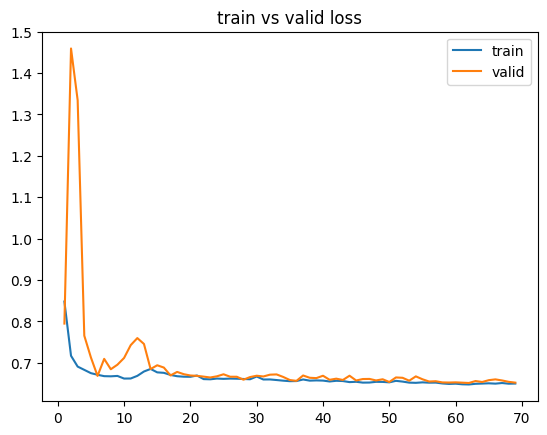

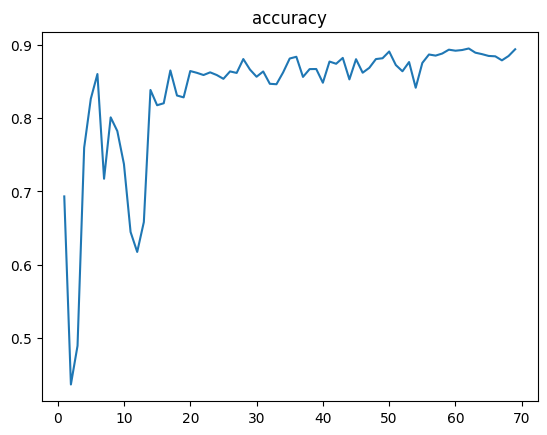

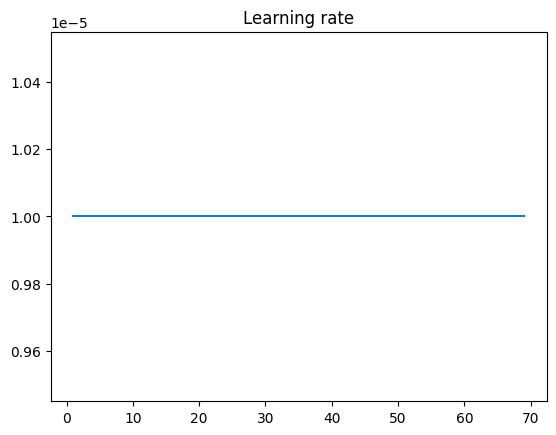

In [34]:
plot_running(str(Path("checkpoints/running.csv")))